# Job Market Insights Using APIs: Skill Demand, Experience Trends, and Role Analysis


In [55]:
# Step 1:Install & Import required libraries
import requests   # to call the API
import json       # to work with JSON data
import pandas as pd   # to process and analyze data
import matplotlib.pyplot as plt    # Import Matplotlib for Creating Charts and Visualizations
import numpy as np # Import NumPy for Numerical and Array Operations

# Install OpenPyXL Library (Required for Excel Export)
!pip install openpyxl

# Accessing Job Data from the Local Flask API

In [56]:
# step 2: Store the Jobs API Endpoint in a Variable(Define the API URL for the Jobs Dataset)
api_url="http://127.0.0.1:5000/data/all"
# step 3: Send a GET Request to the Jobs API and Receive the Response
response = requests.get(api_url)

# Step 4: Convert the API Response from JSON Format into a Python Object
jobs = response.json()

# Step 5: Display the Total Number of Job Records Returned by the API
print("Total job records:", len(jobs))


Total job records: 27005


In [57]:
# Step 6:Define function for- Count Number of Jobs That Require a Given Technology
def get_number_of_jobs_T(technology):
    number_of_jobs = 0
    
    for job in jobs:
        if technology.lower() in job.get("Key Skills","").lower():
            number_of_jobs += 1
            
    return technology, number_of_jobs

In [58]:
# Step 7: Count Number of Python Job Postings
get_number_of_jobs_T("Python")

('Python', 1173)

In [59]:
# Step 8: Define function for -Count Jobs for a Given Location
def get_number_of_jobs_L(location):

    number_of_jobs = 0   # counter

    for job in jobs:   # loop through all job records
        if location.lower() in job.get("Location", "").lower():
            number_of_jobs += 1

    return location, number_of_jobs



In [60]:
# Step 9: Test the Location Job Count Function for Los Angeles
get_number_of_jobs_L("Los Angeles")


('Los Angeles', 640)

In [61]:
# Step 10: Count jobs for multiple locations
# Instead of calling one city at a time, loop through a list.
cities = ["Los Angeles", "New York", "Seattle", "Austin", "Detroit"]

for city in cities:
    loc, count = get_number_of_jobs_L(city)
    print(f"{loc}: {count} jobs")


Los Angeles: 640 jobs
New York: 3226 jobs
Seattle: 3375 jobs
Austin: 434 jobs
Detroit: 3945 jobs


In [62]:
# Step 11: count jobs for multiple technologies
technologies = [
    "Python", "Java", "C", "C#", "C++",
    "JavaScript", "Scala", "Oracle",
    "SQL Server", "MySQL Server",
    "PostgreSQL", "MongoDB"
]
for tech in technologies:
    t, count = get_number_of_jobs_T(tech)
    print(f"{t}: {count} jobs")


Python: 1173 jobs
Java: 3428 jobs
C: 25114 jobs
C#: 526 jobs
C++: 506 jobs
JavaScript: 2248 jobs
Scala: 138 jobs
Oracle: 899 jobs
SQL Server: 423 jobs
MySQL Server: 0 jobs
PostgreSQL: 86 jobs
MongoDB: 208 jobs


# Top Skills in the Job Market

In [63]:
# step 12: Skill Demand Analysis — Most Frequent Skills

# Import the Counter class from the collections module so we can count repeated items easily
from collections import Counter

# Create an empty list to store all skills
all_skills = []

# Loop through every job
for job in jobs:
    skills = job.get("Key Skills", "")                                   #Get the "Key Skills" field safely
    skills = [s.strip() for s in skills.split("|") if s.strip() != ""]   # Split the skills into a list
    all_skills.extend(skills)                                            # Add skills to the big list
    
# Count how often each skill appears
skill_counts = Counter(all_skills)                                   
# Get the Top 15 skills
top_skills = skill_counts.most_common(15)

top_skills   # <-- Jupyter will display output here


[('Javascript', 1434),
 ('SQL', 1292),
 ('HTML', 1285),
 ('Sales', 1221),
 ('Python', 1165),
 ('Management', 835),
 ('Recruitment', 806),
 ('Business Executive', 777),
 ('Java', 751),
 ('MySQL', 746),
 ('Monitoring', 665),
 ('Technical support', 654),
 ('Linux', 643),
 ('design', 635),
 ('C', 626)]

Key Insights:
    
The results show that the most frequent skills are JavaScript, SQL, HTML, Python, Java, MySQL, Linux, and C, indicating strong demand for programming, databases, and web-technology skills. At the same time, skills like Sales, Recruitment, Management, Technical Support, and Business Executive appear often, meaning the dataset includes a mix of technical and non-technical job roles. Overall, SQL and Python stand out as important, widely-required skills across multiple job categories.

In [64]:
# Step 13: Convert to DataFrame
df_skills = pd.DataFrame(top_skills, columns=["Skill", "Frequency"])
df_skills

,Skill,Frequency
0,Javascript,1434
1,SQL,1292
2,HTML,1285
3,Sales,1221
4,Python,1165
5,Management,835
6,Recruitment,806
7,Business Executive,777
8,Java,751
9,MySQL,746


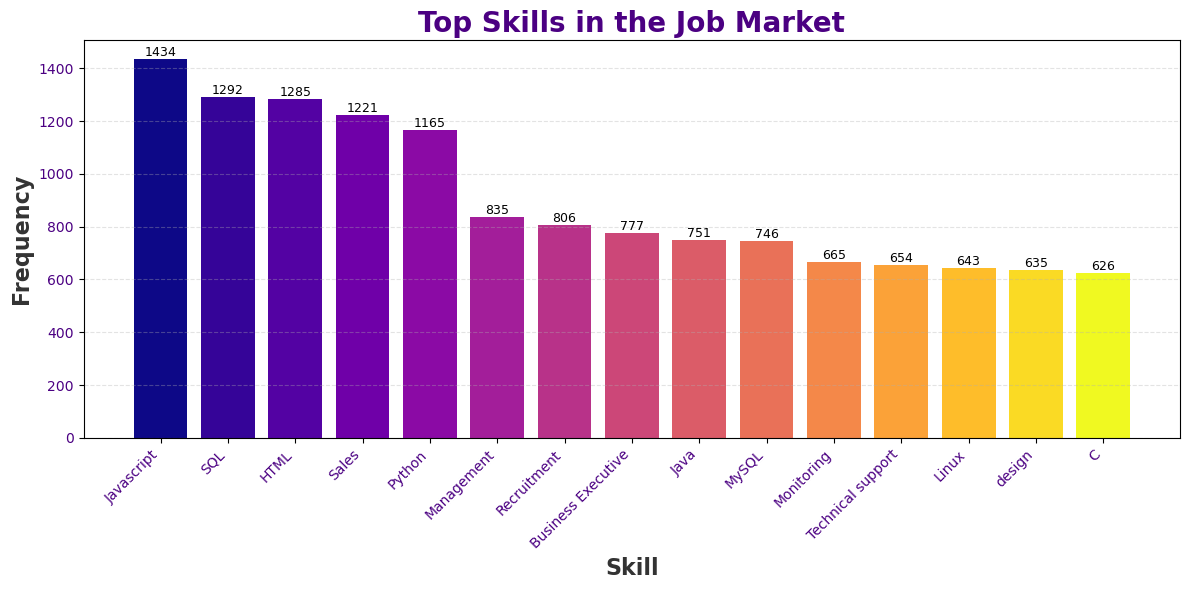

In [65]:
# Step 14: Bar chart- Top Skills in the Job Market


plt.figure(figsize=(12,6))

# Colorful bar colors
colors = plt.cm.plasma(np.linspace(0,1,len(df_skills)))

bars = plt.bar(
    df_skills["Skill"],
    df_skills["Frequency"],
    color=colors
)

#  Title & label styling
plt.title(
    "Top Skills in the Job Market",
    fontsize=20,
    weight="bold",
    color="#4B0082"      # Indigo title color
)

plt.xlabel(
    "Skill",
    fontsize=16,
    weight="bold",
    color="#333333"      # Dark grey label
)

plt.ylabel(
    "Frequency",
    fontsize=16,
    weight="bold",
    color="#333333"
)

# Rotate labels for readability
plt.xticks(rotation=45, ha="right", fontsize=10, color="#4B0082")
plt.yticks(fontsize=10, color="#4B0082")

# Soft grid for readability
plt.grid(axis="y", linestyle="--", alpha=0.35)

# Add value labels on bars
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        int(bar.get_height()),
        ha="center",
        va="bottom",
        fontsize=9,
        color="#000000"
    )

plt.tight_layout()
plt.show()


# Key Insights:

JavaScript, SQL, and HTML are the most in-demand skills, showing strong demand for web and database skills.

Python also has a high job demand, highlighting its importance in data, analytics, and programming roles.

Management and Recruitment appearing in the list shows that business and coordination roles are also needed along with technical roles.

MySQL, Linux, and Technical Support skills indicate steady demand for IT operations and system support jobs.

Overall, the job market shows a balanced mix of technical, data, web, and support-focused roles.

# Job Openings by Experience Level

In [66]:
# Step 15: Job Openings by Experience Level

# Count how many jobs fall under each experience level
exp_counts = Counter(job.get("Job Experience Required","Unknown") for job in jobs)

# Convert the experience frequency data into a DataFrame
df_exp = pd.DataFrame(exp_counts.items(), columns=["Experience Level", "Job Count"])

# Display the experience-level job distribution table
df_exp



,Experience Level,Job Count
0,5 - 10 yrs,1406
1,2 - 5 yrs,1859
2,0 - 1 yrs,791
3,0 - 5 yrs,862
4,5 - 7 yrs,291
...,...,...
241,17 - 21 yrs,1
242,9 - 13 Years,2
243,16 - 21 yrs,1
244,13 - 19 yrs,1


# Key Insights:
    
The largest demand is for 2–5 years experience, indicating companies prefer candidates with some hands-on experience rather than freshers.

There is still a healthy number of entry-level roles (0–2 years) — good sign for new graduates / career switchers.

Demand decreases after 10+ years — senior jobs are fewer but highly specialized.

The 5–10 years segment shows strong mid-career opportunities.


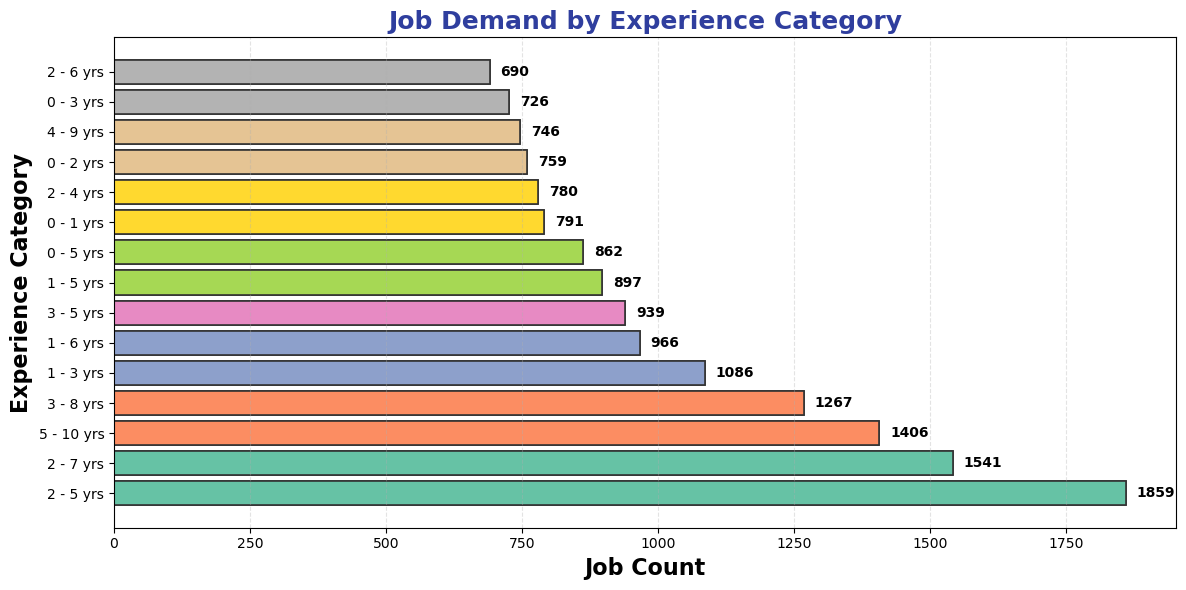

In [67]:
# Step 16: Job Demand by Experience Category – Top 15 Experience Levels - Bar Chart
data = df_exp.sort_values("Job Count", ascending=False).head(15)

plt.figure(figsize=(12,6))

colors = plt.cm.Set2(np.linspace(0, 1, len(data)))

bars = plt.barh(
    data["Experience Level"],
    data["Job Count"],
    color=colors,
    edgecolor="#333333",
    linewidth=1.2
)

plt.title("Job Demand by Experience Category", fontsize=18, weight="bold", color="#2F3E9E")
plt.xlabel("Job Count", fontsize=16, weight="bold" )
plt.ylabel("Experience Category", fontsize=16, weight="bold")

plt.grid(axis="x", linestyle="--", alpha=0.35)

# Value labels on bars
for bar in bars:
    plt.text(
        bar.get_width() + 20,
        bar.get_y() + bar.get_height()/2,
        str(int(bar.get_width())),
        va="center",
        fontsize=10,
        weight="bold"
    )
bars = plt.barh(
    data["Experience Level"],
    data["Job Count"],
    color=colors,
    edgecolor="#333333",
    linewidth=1.2,
    label="Job Count"
)




plt.tight_layout()
plt.show()


# Key Insights:

Jobs are highest for people with 2–5 years of experience, meaning companies prefer early-career professionals.

There is also strong demand for 2–7 years and 3–8 years experience levels, showing employers value mid-level skills.

Freshers and juniors do have opportunities, but fewer compared to mid-level roles.

Demand drops as experience becomes very high or very specialized.

Overall, the market is best for early-to-mid career candidates, not freshers or senior profiles.

# Top 10 Most Frequent Job Titles in the Dataset

In [68]:
# step 17: Top 10 Most Frequent Job Titles in the Dataset
title_counts = Counter(job.get("Job Title", "Unknown") for job in jobs)

df_titles = pd.DataFrame(title_counts.most_common(10), columns=["Job Title", "Job Count"])
df_titles


,Job Title,Job Count
0,Sales Executive,119
1,PHP Developer,117
2,Business Development Executive,117
3,Business Development Manager,98
4,Java Developer,80
5,Software Engineer,80
6,Android Developer,77
7,Graphic Designer,77
8,Content Writer,74
9,Sales Manager,71


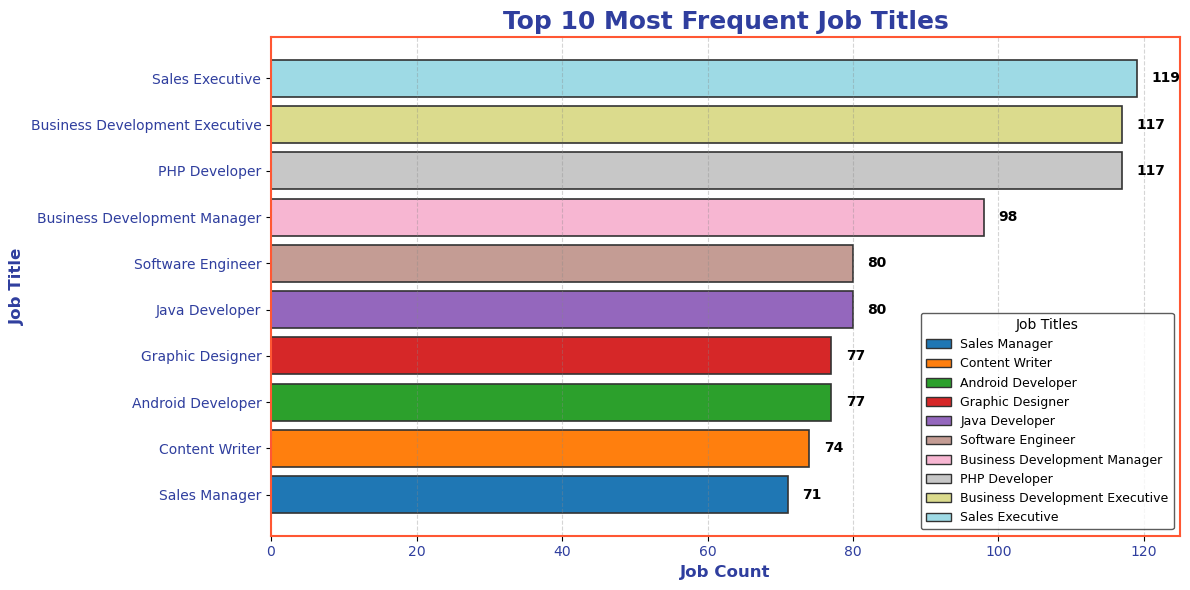

In [69]:
# Step 18: Top 10 Most Frequent Job Titles — Color-Coded Comparison
# Import Patch to Create Custom Legend Items
from matplotlib.patches import Patch

data = df_titles.sort_values("Job Count", ascending=True)

plt.figure(figsize=(12,6))

# Color theme
colors = plt.cm.tab20(np.linspace(0,1,len(data)))
tick_color = "#2F3E9E"      # deep blue
spine_color = "#FF5733"     # coral

bars = plt.barh(
    data["Job Title"],
    data["Job Count"],
    color=colors,
    edgecolor="#333333",
    linewidth=1.2
)

# Title
plt.title(
    "Top 10 Most Frequent Job Titles",
    fontsize=18,
    weight="bold",
    color="#2F3E9E"
)

# Axis labels (colored)
plt.xlabel("Job Count", fontsize=12, weight="bold", color=tick_color)
plt.ylabel("Job Title", fontsize=12, weight="bold", color=tick_color)

# ---- COLORFUL TICKS ----
plt.xticks(color=tick_color, fontsize=10)
plt.yticks(color=tick_color, fontsize=10)

# ---- COLORFUL AXIS LINES (SPINES) ----
for spine in plt.gca().spines.values():
    spine.set_color(spine_color)
    spine.set_linewidth(1.5)

# Soft grid
plt.grid(axis="x", linestyle="--", alpha=0.35, color="#888888")

# Value labels
for bar in bars:
    plt.text(
        bar.get_width() + 2,
        bar.get_y() + bar.get_height()/2,
        int(bar.get_width()),
        va="center",
        fontsize=10,
        weight="bold"
    )

# Legend mapping each color to a job title
legend_items = [
    Patch(facecolor=colors[i], edgecolor="#333333", label=title)
    for i, title in enumerate(data["Job Title"])
]

plt.legend(
    handles=legend_items,
    title="Job Titles",
    loc="lower right",
    facecolor="#FFFFFF",
    edgecolor="#333333",
    fontsize=9,
    title_fontsize=10
)

plt.tight_layout()
plt.show()


# Key Insights:

The most common jobs are Sales roles and Business Development roles.

There is also good demand for PHP, Java, and Software Developers.

Creative roles like Graphic Designer and Content Writer are also required.

The job market includes a mix of business, technology, and creative jobs — not just IT jobs.

# Exporting Job Market Analysis Results to Excel

In [70]:
# step 19: Generating an Excel Report from API-Based Job Data

# df_jobs = full job dataset
df_jobs = pd.DataFrame(jobs)
# Create an Excel file and open writer
with pd.ExcelWriter("job_analysis_report.xlsx") as writer:

    # Save raw job dataset to Sheet 1
    df_jobs.to_excel(writer, sheet_name="Raw_Job_Data", index=False)

    # Save skill demand results to Sheet 2
    df_skills.to_excel(writer, sheet_name="Skill_Demand", index=False)

    # Save experience analysis to Sheet 3
    df_exp.to_excel(writer, sheet_name="Experience_Demand", index=False)

    # Save top job titles to Sheet 4
    df_titles.to_excel(writer, sheet_name="Top_Job_Titles", index=False)

# Success message
print("Excel report generated successfully!")


Excel report generated successfully!


# Business Insights (Summary)

Most job openings target 2–5 years of experience, showing strong demand for mid-level professionals.

Core technical skills like JavaScript, SQL, HTML, and Python are highly in demand.


Companies are also hiring in Sales and Business Development, indicating a focus on growth and client acquisition.

Roles in software development, IT support, and content/creative fields continue to show steady demand.


Overall, the market requires a mix of technical, business, and support roles, not only IT jobs.